<a href="https://colab.research.google.com/github/bananighosh/Fall-2023-NYU-AI/blob/assignment_1_probability/Copy_of_CS_GY661_AI_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns
import scipy.stats as sc_stats

1a. Generate an array of 10^4 with mean =7.25 and standard deviation = 0.875 that will follow normal distribution

In [ ]:
gs = np.random.normal(loc=7.25, scale=0.875, size=10000)

(array([  2.,   1.,   2.,   3.,   1.,   6.,   5.,  10.,  10.,  29.,  40.,
         40.,  63., 111.,  92., 166., 196., 265., 282., 369., 435., 459.,
        486., 544., 580., 617., 602., 614., 545., 580., 432., 425., 374.,
        366., 282., 229., 191., 134., 123.,  91.,  64.,  29.,  45.,  27.,
         13.,   3.,   9.,   5.,   1.,   2.]),
 array([ 3.7692277 ,  3.90146139,  4.03369509,  4.16592878,  4.29816248,
         4.43039617,  4.56262987,  4.69486356,  4.82709725,  4.95933095,
         5.09156464,  5.22379834,  5.35603203,  5.48826573,  5.62049942,
         5.75273312,  5.88496681,  6.01720051,  6.1494342 ,  6.2816679 ,
         6.41390159,  6.54613529,  6.67836898,  6.81060268,  6.94283637,
         7.07507007,  7.20730376,  7.33953746,  7.47177115,  7.60400485,
         7.73623854,  7.86847224,  8.00070593,  8.13293962,  8.26517332,
         8.39740701,  8.52964071,  8.6618744 ,  8.7941081 ,  8.92634179,
         9.05857549,  9.19080918,  9.32304288,  9.45527657,  9.58751027,
 

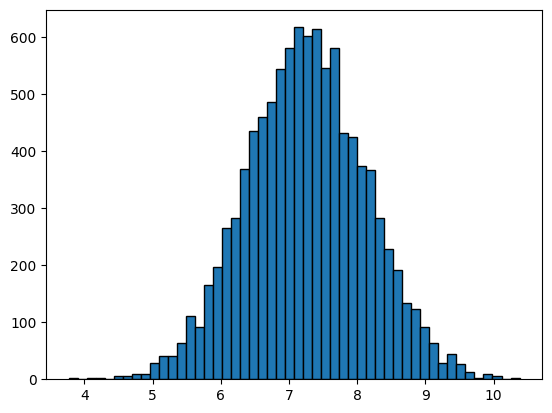

In [ ]:
plot.hist(gs, bins=50, edgecolor='black')

1b. Genrating the variables ak, pp, ptime from Multivate Gaussian distribution and plotting the correlation of the associated plots.

In [ ]:
sigma = np.matrix('1 0.6 -0.9; 0.6 1 -0.5; -0.9 -0.5 1')
sigma

matrix([[ 1. ,  0.6, -0.9],
        [ 0.6,  1. , -0.5],
        [-0.9, -0.5,  1. ]])

In [ ]:
mean = np.zeros(3)
mean

array([0., 0., 0.])

In [ ]:
np.random.seed(1234)
APT = np.random.multivariate_normal(mean, sigma, size=10000)
APT

array([[-0.36127836,  0.34968669,  1.11819525],
       [ 0.35719837,  0.66903158,  0.12974387],
       [-0.94087986, -0.25111819,  1.00707132],
       ...,
       [-0.24770166, -0.23731461,  0.09608915],
       [ 0.01497189, -1.38883417, -0.2708827 ],
       [-1.18425028, -1.33327231,  0.84025677]])

In [ ]:
corr = np.corrcoef(APT, rowvar = False)
corr

array([[ 1.        ,  0.6048432 , -0.90063772],
       [ 0.6048432 ,  1.        , -0.51155345],
       [-0.90063772, -0.51155345,  1.        ]])

In [ ]:
df = pd.DataFrame(APT, columns=['ak', 'pp', 'ptime'])

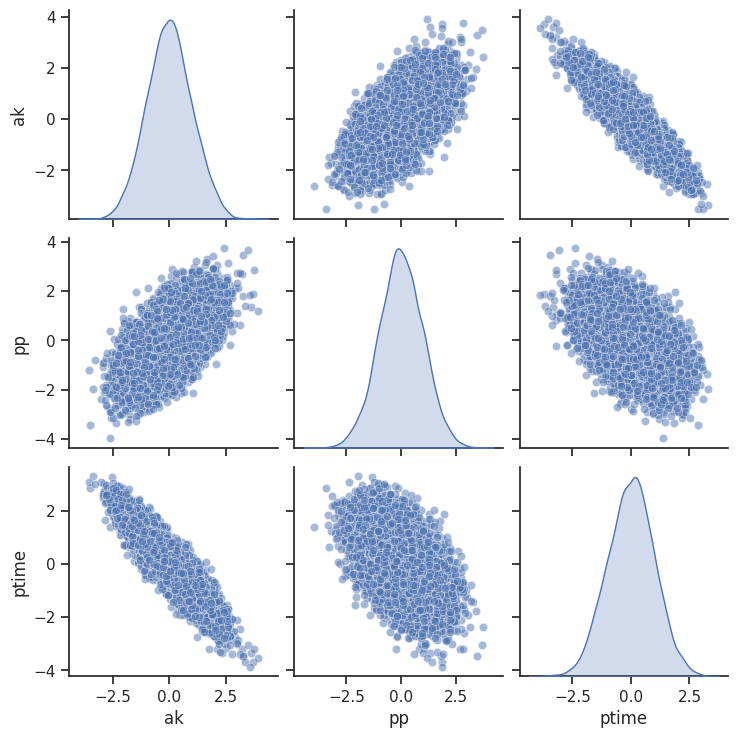

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind='kde', markers="o", plot_kws={'alpha': 0.5})
plot.show()

1c. For normal distribution, we have to consider the mean as 0 and standard deviation as 1 to yield a uniform distribution because we have created 3 correlated normal distribution(0,1) above.
This is the Cumulatiove Distribution function and it is implemented using scioy's stats module's cdf -> Probility Integral Transform as follows.

In [ ]:
U = sc_stats.norm.cdf(APT, loc=0, scale=1)

(array([[ 987., 1022.,  990., 1021., 1020., 1019.,  992.,  934.,  956.,
         1059.],
        [ 995., 1044.,  955., 1042., 1042., 1013.,  956.,  940., 1033.,
          980.],
        [1047.,  985.,  935.,  984.,  961., 1062., 1044.,  994., 1023.,
          965.]]),
 array([3.58997761e-05, 1.00027443e-01, 2.00018987e-01, 3.00010530e-01,
        4.00002073e-01, 4.99993617e-01, 5.99985160e-01, 6.99976703e-01,
        7.99968247e-01, 8.99959790e-01, 9.99951334e-01]),
 <a list of 3 BarContainer objects>)

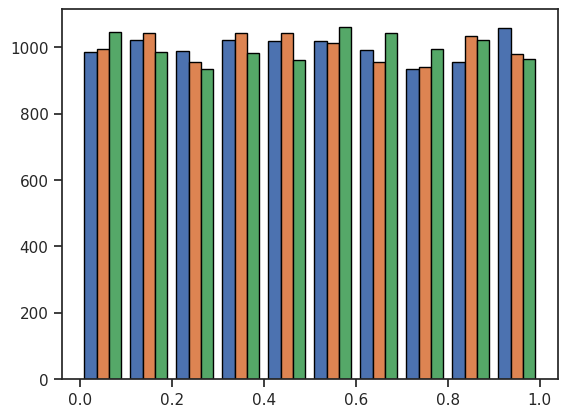

In [ ]:
plot.hist(U, bins=10, edgecolor='black')

Therefore, as expected, the above graph represents a uniform distribution from 0 to 1.
Now let's check the effect on the correlation above:

In [ ]:
corr_new = np.corrcoef(U, rowvar = False)
corr_new

array([[ 1.        ,  0.58632699, -0.89178402],
       [ 0.58632699,  1.        , -0.49527681],
       [-0.89178402, -0.49527681,  1.        ]])

In [ ]:
df1 = pd.DataFrame(U, columns=['ak', 'pp', 'ptime'])

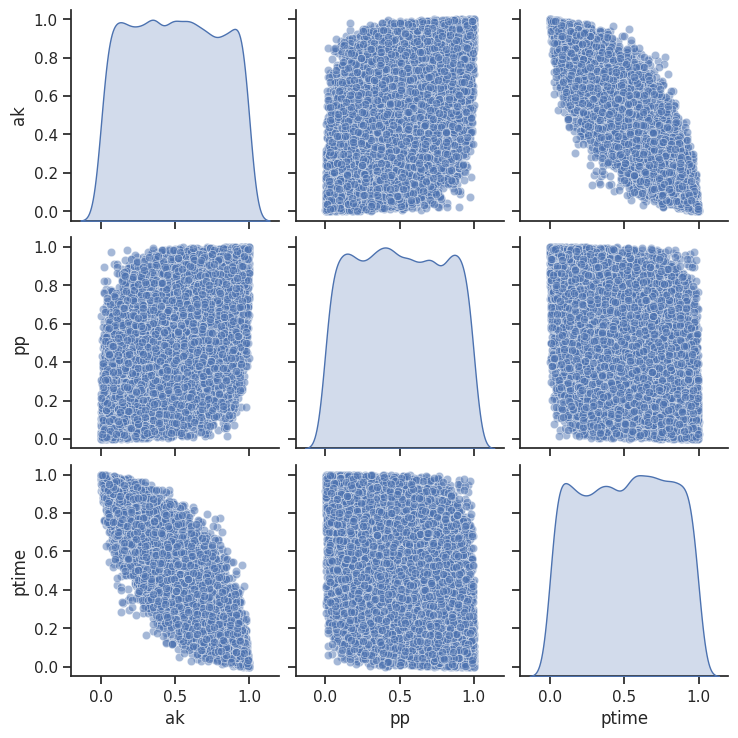

In [ ]:
sns.set(style='ticks')
sns.pairplot(df1, diag_kind="kde", markers="o", plot_kws={'alpha': 0.5})
plot.show()

(array([4.800e+01, 3.380e+02, 0.000e+00, 8.580e+02, 0.000e+00, 1.403e+03,
        0.000e+00, 1.768e+03, 0.000e+00, 1.801e+03, 0.000e+00, 1.445e+03,
        0.000e+00, 9.730e+02, 0.000e+00, 6.470e+02, 3.820e+02, 0.000e+00,
        2.080e+02, 0.000e+00, 8.400e+01, 0.000e+00, 2.800e+01, 0.000e+00,
        7.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 4.000e+00, 1.000e+00]),
 array([ 0.        ,  0.53333333,  1.06666667,  1.6       ,  2.13333333,
         2.66666667,  3.2       ,  3.73333333,  4.26666667,  4.8       ,
         5.33333333,  5.86666667,  6.4       ,  6.93333333,  7.46666667,
         8.        ,  8.53333333,  9.06666667,  9.6       , 10.13333333,
        10.66666667, 11.2       , 11.73333333, 12.26666667, 12.8       ,
        13.33333333, 13.86666667, 14.4       , 14.93333333, 15.46666667,
        16.        ]),
 <BarContainer object of 30 artists>)

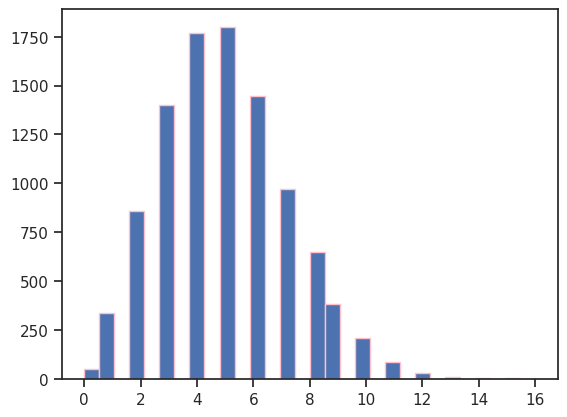

In [ ]:
ak = sc_stats.poisson.ppf(U[:, 0], 5)
plot.hist(ak, bins=30, edgecolor='pink')

Finally correlations between all the variables as shown in the blow graph:

(10000,)

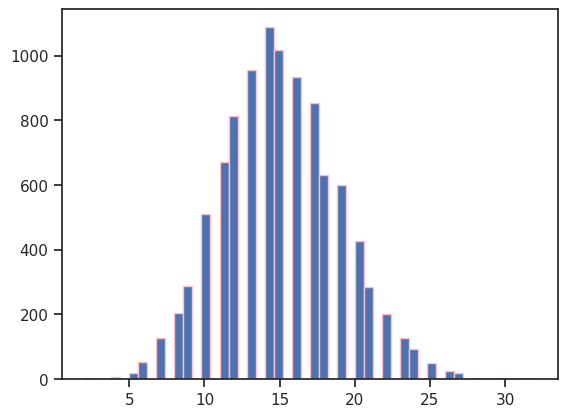

In [ ]:
pp = sc_stats.poisson.ppf(U[:, 1] , 15)
plot.hist(pp, bins=50, edgecolor='pink')

(array([  3.,   3.,  10.,   6.,  20.,  37.,  57., 111., 184., 296., 386.,
        503., 595., 734., 855., 910., 952., 955., 849., 719., 574., 426.,
        309., 209., 122.,  90.,  44.,  22.,  15.,   4.]),
 array([  3.87698164,  11.0299395 ,  18.18289736,  25.33585523,
         32.48881309,  39.64177095,  46.79472881,  53.94768667,
         61.10064454,  68.2536024 ,  75.40656026,  82.55951812,
         89.71247598,  96.86543385, 104.01839171, 111.17134957,
        118.32430743, 125.47726529, 132.63022316, 139.78318102,
        146.93613888, 154.08909674, 161.2420546 , 168.39501247,
        175.54797033, 182.70092819, 189.85388605, 197.00684391,
        204.15980178, 211.31275964, 218.4657175 ]),
 <BarContainer object of 30 artists>)

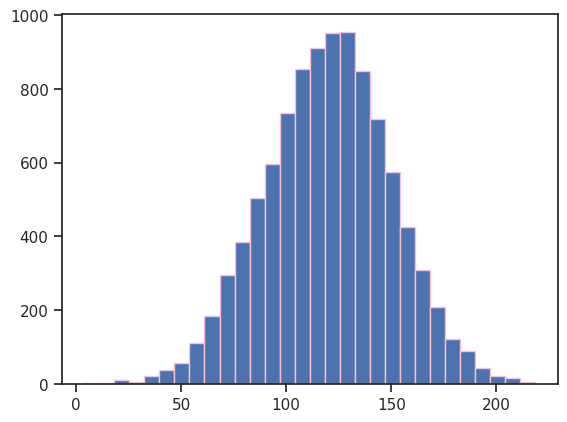

In [ ]:
ptime = sc_stats.norm.ppf(U[:, 2], loc = 120, scale = 30)
plot.hist(ptime, bins=30, edgecolor='pink')

In [ ]:
corr_ak_pp = np.corrcoef(ak, pp, rowvar=False)[0,1]
corr_ak_pp

0.596653543585595

In [ ]:
corr_ak_ptime = np.corrcoef(ak, ptime, rowvar=False)[0,1]
corr_ak_ptime

-0.8893928092846783

In [ ]:
corr_pp_ptime = np.corrcoef(pp, ptime, rowvar=False)[0,1]
corr_pp_ptime

-0.5101952523479483

In [ ]:
corr_ak_gs = np.corrcoef(gs, ak, rowvar=False)[0,1]
corr_ak_gs

0.002856056544150593

In [ ]:
corr_pp_gs = np.corrcoef(gs, pp, rowvar=False)[0,1]
corr_pp_gs

-0.0027437485596237252

In [ ]:
corr_ptime_gs= np.corrcoef(gs, ptime, rowvar=False)[0,1]
corr_ptime_gs

-0.004176298553017717

In [ ]:
# correlated_data = np.vstack((ak,pp,ptime,gs)).reshape(-1,4)
# # correlated_data = np.hstack((ak,pp,ptime,gs)).reshape(-1,1)
# correlated_data
# df_all = pd.DataFrame(correlated_data, columns = ('ak','pp','ptime','gs'))
# print(correlated_data,df_all)

In [ ]:
df_all_new = pd.DataFrame({'ak':ak,'pp':pp,'ptime':ptime,'gs':gs })

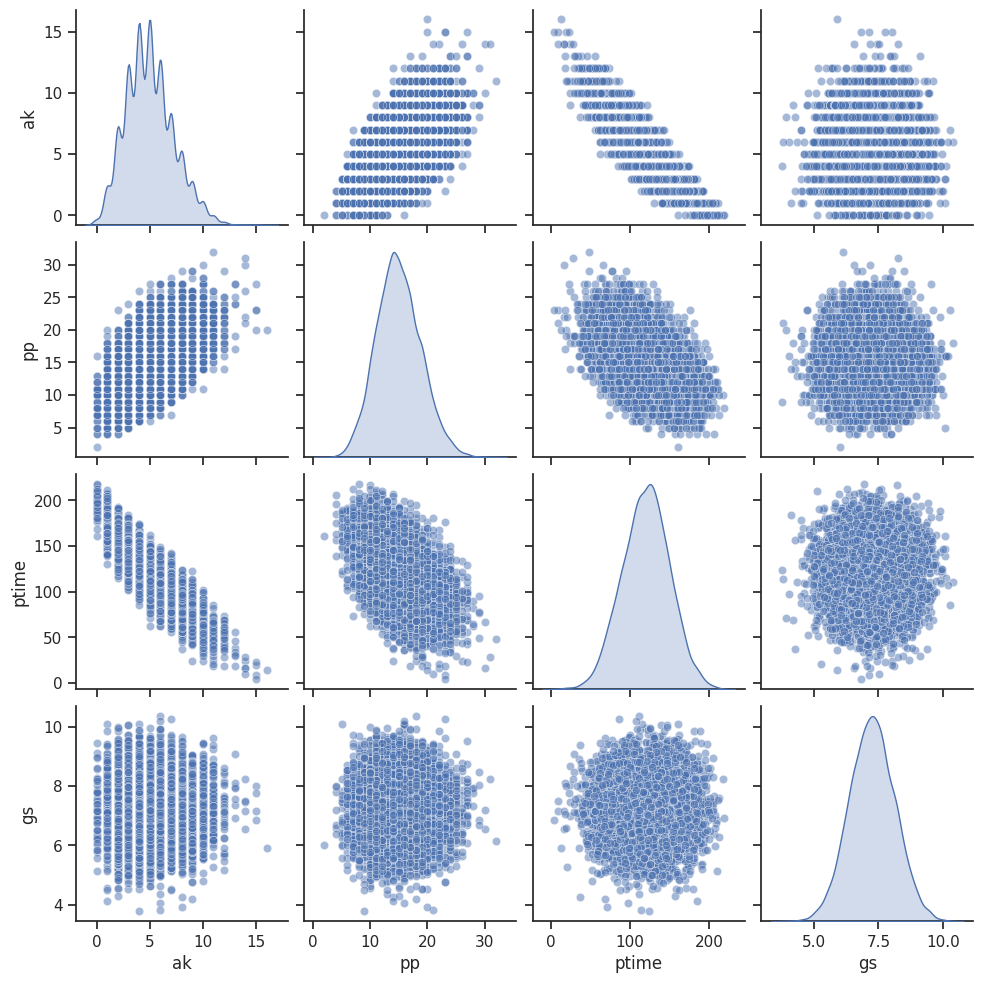

In [ ]:
sns.set(style='ticks')
sns.pairplot(df_all_new, diag_kind="kde", markers='o', plot_kws={'alpha' : 0.5})
plot.show()

2. Let $x_i$ i.e {$x_1$, $x_2$, $x_3$, ... $x_i$} be the incoming data samples, where each data sample $x_i$ is a 4-dimensional vector i.e [$x_{i1}$, [$x_{i2}$, $x_{i3}$,$x_{i4}$]]
    - Calculating the sample 4-dimensional Mean vector "$\mu$ ($1 \times 4$ vector)"
        - $\mu_{i} = \frac{1}{i} \sum_{k=1}^{i} x_{ik}$
        
    - Centering the data : achieved by subtracting the mean vector from each data sample
        - $\hat{x}_i = x_i - \mu_i $

    - Sample co-variance matrix [4 x 4 matrix in this case]:
        - $C_{i} = \frac{1}{i - 1} \sum_{k=1}^{i} \hat{x}_i \cdot (\hat{x}_i)^T $

    - calculate the standard deviations:
        - $\sigma_{i} = \sqrt {\frac{1}{i - 1} * \sum_{k=1}^{i}(x_{ik} - μ_k)^2}$
        - i.e,  $\sigma_{i} = \sqrt {\frac{1}{i - 1} * \sum_{k=1}^{i}(\hat{x}_k)^2}$
        
    - Finally,the *Sample corelation matrix(Si)* by standardizing / normalizing the covariance matrix as follows:
        - ### $S_{i} = \frac{C_{i}} {\sigma_{i} \quad * \quad \sigma_{i}}$